In [ ]:

import requests
from bs4 import BeautifulSoup
import pandas as pd


required_fields = ['Type Of Traveller', 'Seat Type', 'Route',	'Date Flown',	'Seat Comfort',	'Cabin Staff Service', 'Ground Service', 'Value For Money']
customer_ratings = []
review_date = []
review_text = []
type_of_traveler = []
seat_type = []
route = []
date_flown = []
seat_comfort_rating = []
cabin_Staff_service = []
ground_service =[]
value_for_money = []

url = "https://www.airlinequality.com/airline-reviews/british-airways/?sortby=post_date%3ADesc&pagesize=100"
no_of_pages = 36
for page_no in range(1,no_of_pages+1):
  url = f"https://www.airlinequality.com/airline-reviews/british-airways/page/{page_no}/?sortby=post_date%3ADesc&pagesize=100"
  data = requests.get(url)

  soup = BeautifulSoup(data.content, 'html5lib')

  reviews_container = soup.findAll('article', attrs = {'itemprop':'review'})



  for review in reviews_container:

    reviews_info = {}

    rating_val = review.find('span', attrs = {'itemprop':'ratingValue'})
    if rating_val is not None:
      rating_val = rating_val.get_text(strip=True)

    date = review.find('time', attrs = {'itemprop':'datePublished'}).get_text(strip=True)
    reviewbody = review.find('div', attrs = {'itemprop':'reviewBody'}).get_text(strip=True)

    customer_ratings.append(rating_val)
    review_date.append(date)
    review_text.append(reviewbody)

    for i in review.find('table', attrs = {'class':'review-ratings'}).findAll('tr'):
      data_header_span,data_value_span = i.findAll('td')

      data_header = data_header_span.get_text(strip=True)

      if data_header in required_fields:
        if len(data_value_span)>1:
          rating_stars = data_value_span.findAll('span',attrs = {'class': 'star fill'})
          max_rating = rating_stars[len(rating_stars)-1]
          data_value = max_rating.get_text(strip=True)
        else:
          data_value = data_value_span.get_text(strip=True)

        reviews_info[data_header] = data_value

    type_of_traveler.append(reviews_info.get('Type Of Traveller'))
    seat_type.append(reviews_info.get('Seat Type'))
    route.append(reviews_info.get('Route'))
    date_flown.append(reviews_info.get('Date Flown'))
    seat_comfort_rating.append(reviews_info.get('Seat Comfort'))
    cabin_Staff_service.append(reviews_info.get('Cabin Staff Service'))
    ground_service.append(reviews_info.get('Ground Service'))
    value_for_money.append(reviews_info.get('Value For Money'))

df = pd.DataFrame({'Customer Rating(out of 10)':customer_ratings, 'Review Date':review_date, 'Review':review_text , 'Type_of_traveler':type_of_traveler,'Seat_type':seat_type,'Route':route,'Date_flown':date_flown,
             'Seat_comfort':seat_comfort_rating,'Cabin_Staff_service':cabin_Staff_service,'Ground_service':ground_service,
             'Value_for_money':value_for_money})
df.head()


,Customer Rating(out of 10),Review Date,Review,Type_of_traveler,Seat_type,Route,Date_flown,Seat_comfort,Cabin_Staff_service,Ground_service,Value_for_money
0,1,30th June 2023,✅Trip Verified| Came from Glasgow to London a...,Family Leisure,Economy Class,Glasgow to London,June 2023,1,1,1,1
1,1,29th June 2023,✅Trip Verified| My flight on on 12 May 2023 g...,Solo Leisure,Economy Class,Dubai to Keflavik via London,May 2023,1,1,1,1
2,2,29th June 2023,Not Verified| Cairo is a 5 hour flight and BA...,Couple Leisure,Economy Class,Cairo to London,June 2023,1,1,2,1
3,1,27th June 2023,✅Trip Verified| After travelling London to Ma...,Solo Leisure,Economy Class,London to Madrid,May 2023,3,3,1,1
4,1,27th June 2023,✅Trip Verified| My luggage was mis-tagged in ...,Family Leisure,Economy Class,London to Cairo,June 2023,1,1,1,1


In [4]:
import pandas as pd
airline_reviews = pd.read_csv('Airline_reviews_Rahul.csv')

In [ ]:
airline_reviews.head()

,Review,Review Date,Review2,Type_of_traveler,Seat_type,Route,Date_flown,Seat_comfort,Cabin_Staff_service,Ground_service,Value_for_money
0,Negative,30th June 2023,✅Trip Verified| Came from Glasgow to London a...,Family Leisure,Economy Class,Glasgow to London,Jun-23,1,1,1,1
1,Negative,29th June 2023,✅Trip Verified| My flight on on 12 May 2023 g...,Solo Leisure,Economy Class,Dubai to Keflavik via London,May-23,1,1,1,1
2,Negative,29th June 2023,Not Verified| Cairo is a 5 hour flight and BA...,Couple Leisure,Economy Class,Cairo to London,Jun-23,1,1,2,1
3,Negative,27th June 2023,✅Trip Verified| After travelling London to Ma...,Solo Leisure,Economy Class,London to Madrid,May-23,3,3,1,1
4,Negative,27th June 2023,✅Trip Verified| My luggage was mis-tagged in ...,Family Leisure,Economy Class,London to Cairo,Jun-23,1,1,1,1


In [5]:
df1 = airline_reviews[['Review','Review2']]
df1.rename(columns={'Review2':'Text'},inplace=True)
df1.head()

<ipython-input-5-4f0f92a41225>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'Review2':'Text'},inplace=True)


,Review,Text
0,Negative,✅Trip Verified| Came from Glasgow to London a...
1,Negative,✅Trip Verified| My flight on on 12 May 2023 g...
2,Negative,Not Verified| Cairo is a 5 hour flight and BA...
3,Negative,✅Trip Verified| After travelling London to Ma...
4,Negative,✅Trip Verified| My luggage was mis-tagged in ...


In [ ]:
pip install nltk

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
df1['num_chars'] = df1['Text'].apply(lambda x:len(x))
df1['num_words'] = df1['Text'].apply(lambda x: len(nltk.word_tokenize(x)))
df1['num_sentences'] = df1['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    z = []
    for i in y:
        if i not in stopwords.words('english') and i not in string.punctuation:
            z.append(i)

    text = []
    for i in z:
        text.append(ps.stem(i))


    return " ".join(text)
df1['transformed_text'] = df1['Text'].apply(transform_text)

<ipython-input-10-2608d7180bf8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['num_chars'] = df1['Text'].apply(lambda x:len(x))
<ipython-input-10-2608d7180bf8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['num_words'] = df1['Text'].apply(lambda x: len(nltk.word_tokenize(x)))
<ipython-input-10-2608d7180bf8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [15]:
df1.head(1)

,Review,Text,num_chars,num_words,num_sentences,transformed_text
0,Negative,✅Trip Verified| Came from Glasgow to London a...,295,54,4,came glasgow london took connect flight americ...


In [12]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

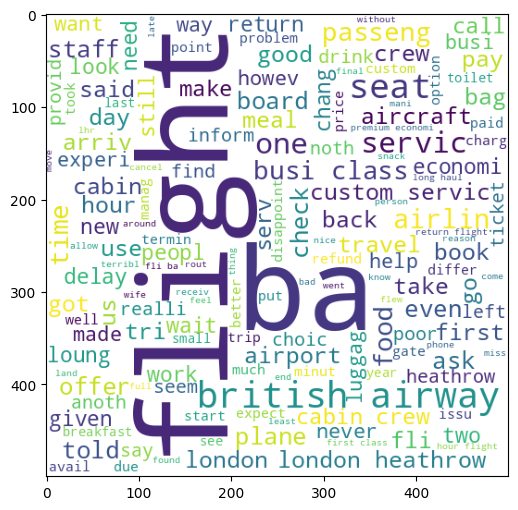

In [18]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df1[df1['Review'] == 'Negative']['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

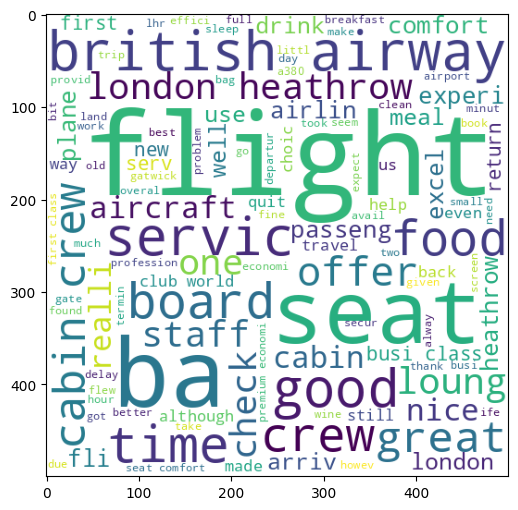

In [19]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df1[df1['Review'] == 'Positive']['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [79]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

# ord_features = ["Review"]
# ordinal_transformer = OrdinalEncoder()

# cat_features = ["Review"]
# categorical_transformer = OneHotEncoder(drop='first',sparse=True)

# ct = ColumnTransformer(transformers=[
#     ("OHE", categorical_transformer, cat_features),
# ])
# #
# df_new = ct.fit_transform(df1).toarray()

# label_encoder = LabelEncoder()

# # Encode labels in column 'species'.
# df1['Review_Label']= label_encoder.fit_transform(df1['Review'])

# df1['Review_Label'].unique()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [91]:
# df1[['0','1']] = pd.DataFrame(df_new)
df1[['0','1','Review']].sample(10)

,0,1,Review
2257,1.0,0.0,Neutral
651,0.0,1.0,Positive
1283,0.0,1.0,Positive
699,0.0,1.0,Positive
34,0.0,0.0,Negative
1055,0.0,1.0,Positive
1515,0.0,0.0,Negative
623,0.0,0.0,Negative
1084,0.0,0.0,Negative
1201,1.0,0.0,Neutral


In [27]:
df1[['Review','Review_ecoding']].sample(10)

,Review,Review_ecoding
869,Positive,2.0
481,Negative,0.0
928,Positive,2.0
813,Neutral,1.0
2374,Positive,2.0
1783,Negative,0.0
1279,Negative,0.0
1525,Negative,0.0
741,Neutral,1.0
1330,Neutral,1.0


In [31]:
# df1.rename({'Review_ecoding':'Review_encoding'},axis=1,inplace = True)
df1.columns

Index(['Review', 'Text', 'num_chars', 'num_words', 'num_sentences',
       'transformed_text', 'Review_encoding'],
      dtype='object')

In [104]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df1['transformed_text']).toarray()
y = df1['Review'].values

In [96]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [106]:
# mnb.fit(X_train,y_train)
mnb.fit(X_train,y_train)


MultinomialNB()

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df1['transformed_text']).toarray()

In [107]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
# print(precision_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

0.7286245353159851
[[255  45   5]
 [ 34  41  26]
 [ 13  23  96]]
              precision    recall  f1-score   support

    Negative       0.84      0.84      0.84       305
     Neutral       0.38      0.41      0.39       101
    Positive       0.76      0.73      0.74       132

    accuracy                           0.73       538
   macro avg       0.66      0.66      0.66       538
weighted avg       0.73      0.73      0.73       538



In [100]:
y_pred1[0],X_test[0]

('Negative', array([0, 0, 0, ..., 0, 0, 0]))